In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#CHARGER LES DONNÉES

    ##Données générales
df_cine_csp_g= pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Cine_CSP_Global')
df_cine_age_g= pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Cine_Age_Global')

    ##Données Creuse
df_cine_c = pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Cinemas')
df_pop_c= pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Population_creuse')
df_kids_c= pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Enfants_creuse')
df_dip_c= pd.read_excel('C:/Users/paulc/Documents/PROJET 2/data/Cinemas_existants_creuse.xlsx', index_col=None, sheet_name='Diplome_creuse')


CONTEXTE DU MARCHE

<Axes: xlabel='Family_Type', ylabel='Total'>

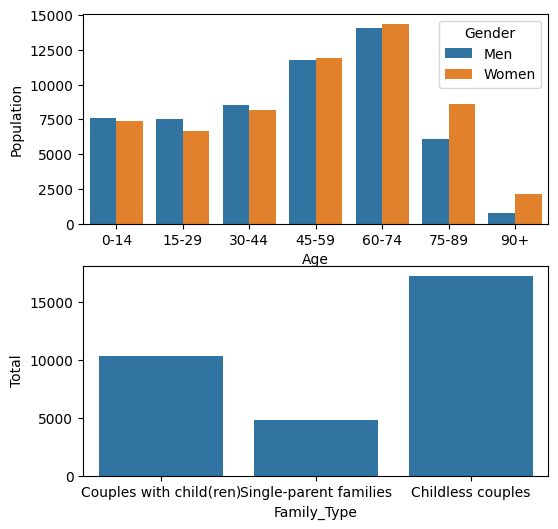

In [127]:
df_pop_c_long= pd.melt(df_pop_c, id_vars= 'Age', value_vars=['Men', 'Women'], var_name= 'Gender', value_name= 'Population')
fig, axes= plt.subplots(2,1, figsize= (6,6))
sns.barplot(df_pop_c_long, x= 'Age', y= 'Population', hue= 'Gender', ax= axes[0])
sns.barplot(df_kids_c, x= 'Family_Type', y= 'Total', ax= axes[1])

In [121]:
display(df_kids_c)
df_pop_c_long

,Family_Type,Total
0,Couples with child(ren),10288
1,Single-parent families,4813
2,Childless couples,17278


,Age,Gender,Population
0,0-14,Men,7599
1,15-29,Men,7501
2,30-44,Men,8511
3,45-59,Men,11791
4,60-74,Men,14076
5,75-89,Men,6105
6,90+,Men,767
7,0-14,Women,7397
8,15-29,Women,6628
9,30-44,Women,8164


ANALYSE DE LA DEMANDE

In [122]:
df_cine_csp_g

,Catégorie socioprofessionnelle,Aucune fois,De 1 à 3 fois,Plus de 3 fois,Ne sait pas / Refus
0,Agriculteurs exploitants,"65,2","28,2","5,9","0,8"
1,"Artisans, commerçants, chefs d'entreprise","61,0","28,2","9,2","1,6"
2,Cadres et professions intellectuelles supérieures,"34,7","39,6","24,4","1,3"
3,Professions intermédiaires,"42,9","38,4","17,3","1,3"
4,Employés,"54,5","30,6","12,8","2,1"
5,Ouvriers (y compris ouvriers agricoles),"66,9","23,0","7,4","2,7"
6,Retraités,"75,1","15,4","8,2","1,3"
7,Autres inactifs,"42,7","30,6","20,9","5,8"
8,Ensemble,"57,6","26,7","13,5","2,2"


In [123]:
pt_cine_age_g= df_cine_age_g.pivot_table(index= ['Age', 'Gender'], values= ['Never', '1to3', '3+', 'No answer'], aggfunc='sum')
pt_cine_age_g


1to3    3+ Never No answer
Age   Gender                              
16-24 Ensemble  40,1  27,8  25,8       6,3
      Femmes    42,3  28,9  23,8       5,1
      Hommes    38,0  26,8  27,8       7,4
25-39 Ensemble  35,7  15,8  46,2       2,4
      Femmes    37,4  15,1  45,6       2,0
      Hommes    33,9  16,6  46,8       2,8
40-59 Ensemble  29,1  12,1  57,3       1,5
      Femmes    29,5  12,3  56,8       1,3
      Hommes    28,7  11,8  57,7       1,7
60+   Ensemble  14,3   8,2  76,4       1,2
      Femmes    15,3   8,9  74,8       1,1
      Hommes    13,0   7,3  78,5       1,3

Text(0.5, 1.0, "Fréquentation des cinémas selon l'âge et le genre")

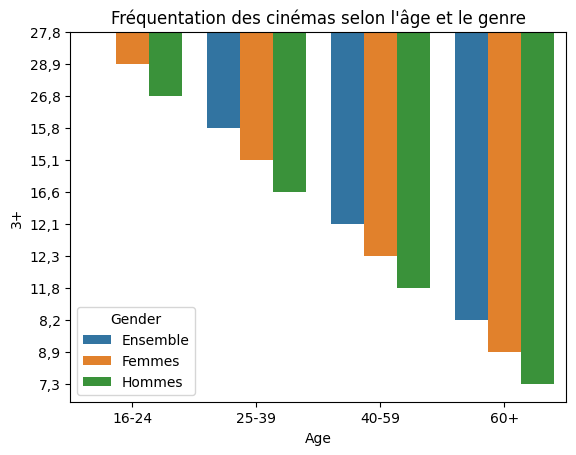

In [124]:
sns.barplot(x= 'Age', y= '3+', hue= pt_cine_age_g.index.get_level_values(1), data= pt_cine_age_g)
plt.title("Fréquentation des cinémas selon l'âge et le genre")

ANALYSE DE L'OFFRE

In [125]:
df_cine_c

,régionCNC,nom,région administrative,adresse,code INSEE,commune,population de la commune,DEP,unité urbaine,population unité urbaine,...,genre,nombre de films programmés,nombre de films inédits,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,part des séances de films Art et Essai,PdM en entrées des films Art et Essai
0,4,COLBERT,NOUVELLE AQUITAINE,GRANDE RUE,23008,Aubusson,3335,23,Aubusson,3335,...,FIXE,343,271,0.603048,0.225114,0.118289,0.053549,222,0.512538,0.405505
1,4,CINEMA CLAUDE MILLER,NOUVELLE AQUITAINE,PLACE DE L HOTEL DE VILLE,23030,Bourganeuf,2674,23,Bourganeuf,2674,...,FIXE,178,137,0.652301,0.166981,0.143544,0.037174,89,0.386179,0.391655
2,4,LE MARCHOIS,NOUVELLE AQUITAINE,RUE DES DEUX FRERES,23067,La Courtine,806,23,Zone rurale,14183345,...,FIXE,94,84,0.684000,0.179500,0.132000,0.004500,28,0.253521,0.155500
3,4,SALLE DES FETES,NOUVELLE AQUITAINE,SALLE DES FETES,23075,Dun-le-Palestel,1114,23,Zone rurale,14183345,...,ITINERANT,111,56,0.749026,0.138103,0.072349,0.040522,52,0.320896,0.343460
4,4,ALPHA,NOUVELLE AQUITAINE,RUE DE RENTIERE,23076,Évaux-les-Bains,1322,23,Zone rurale,14183345,...,FIXE,190,153,0.665987,0.205138,0.093363,0.035512,99,0.423231,0.316548
5,4,SENECHAL,NOUVELLE AQUITAINE,1 RUE DU SENECHAL,23096,Guéret,13327,23,Guéret,14402,...,FIXE,401,313,0.481794,0.352478,0.128506,0.037222,253,0.382484,0.247803
6,4,EDEN,NOUVELLE AQUITAINE,PLACE ST JACQUES,23176,La Souterraine,5182,23,La Souterraine,5182,...,FIXE,225,170,0.534258,0.235759,0.162179,0.067804,131,0.518417,0.443526


ANALYSE FINANCIERE

ANALYSE DE L'ENVIRRONEMENT

In [3]:
import pandas as pd
import geopandas as gpd

# 1) Données (à ajuster avec des coordonnées précises)
df = pd.DataFrame([
    {"cinema": "Véo Le Sénéchal", "commune": "Guéret",        "lon": 1.8719, "lat": 46.1719},
    {"cinema": "Eden",            "commune": "La Souterraine","lon": 1.4896, "lat": 46.2369},
    {"cinema": "Le Colbert",      "commune": "Aubusson",      "lon": 2.1694, "lat": 45.9522},
    {"cinema": "Cinéma Alpha",    "commune": "Évaux-les-Bains","lon": 2.4897,"lat": 46.1755},
    {"cinema": "Claude Miller",   "commune": "Bourganeuf",    "lon": 1.7451, "lat": 45.9798},
])

# 2) Conversion en GeoDataFrame (coordonnées WGS84)
gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:4326"
)

# 3) Reprojection en Lambert-93 (mètres) pour calculer des buffers en km
gdf_points_2154 = gdf_points.to_crs("EPSG:2154")

# 4) Buffer de 10 km = 10 000 mètres
gdf_buffers_10km = gdf_points_2154.copy()
gdf_buffers_10km["geometry"] = gdf_points_2154.geometry.buffer(10_000)

# 5) Export GeoJSON (prêt à être chargé dans QGIS / uMap / etc.)
gdf_points_2154.to_file("cinemas_creuse_points.geojson", driver="GeoJSON")
gdf_buffers_10km.to_file("cinemas_creuse_buffers_10km.geojson", driver="GeoJSON")

print("Fichiers générés : cinemas_creuse_points.geojson et cinemas_creuse_buffers_10km.geojson")

ModuleNotFoundError: No module named 'geopandas'

In [7]:
import geopandas as gpd
print(gpd.__version__)


ModuleNotFoundError: No module named 'geopandas'